# Tempo Comparative Statistics and Plots

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
tempo_vals= [5451502130823168.0, 1600617004924928.0, 1417284715282432.0, 980449362968576.0, 
            1778309062983680.0, 7528010370514944.0]
flight_vals= [3461380000000000.0, 8908120000000000.0, 1121250000000000.0, 8199060000000000.0, 
             9767990000000000.0, 1058180000000000.0]

In [3]:
def m_to_m(molec):
    # Start with molecules/cm^2
    moles= molec * (100)**2 / (6.022 * 10**23)
    # With stoichiometry, return moles/m^2
    return moles

## Linear Regression

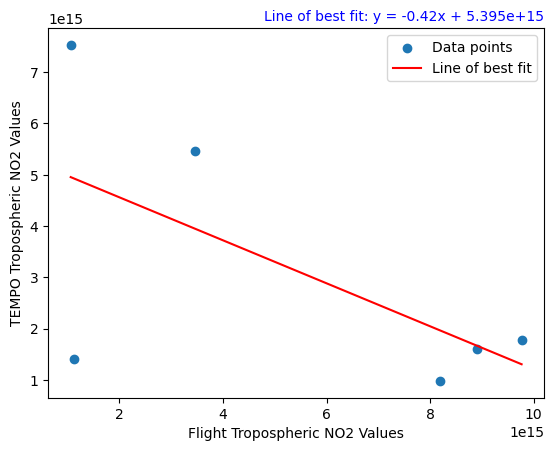

In [4]:
x= flight_vals
y= tempo_vals

# Fit a polynomial of degree 1 (linear fit)
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(np.unique(x))

# Plot the data points
plt.scatter(x, y, label='Data points')

# Plot the line of best fit
plt.plot(np.unique(x), line_of_best_fit, label='Line of best fit', color='red')

# Equation of the line
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.3e}'

# Add the equation to the plot
plt.text(1, 1.05, str(f'Line of best fit: {equation}'), transform=plt.gca().transAxes, fontsize=10, color='blue', ha='right', va='top')

# Add labels and legend
plt.xlabel('Flight Tropospheric NO2 Values')
plt.ylabel('TEMPO Tropospheric NO2 Values')
plt.legend()

plt.ticklabel_format(style='sci', axis='x', scilimits= (15,15))
plt.ticklabel_format(style= 'sci', axis= 'y', scilimits= (15,15))

# Show the plot
plt.show()
 

## Mean and Standard Deviations

In [5]:
# Mean and Standard Deviation
flight_mean, flight_std = np.mean(flight_vals), np.std(flight_vals, ddof=1)
tempo_mean, tempo_std = np.mean(tempo_vals), np.std(tempo_vals, ddof=1)
print(f'Mean of Flight data: {flight_mean:.2e}, Standard Deviation of Flight data: {flight_std:.2e}')
print(f'Mean of TEMPO data: {tempo_mean:.2e}, Standard Deviation of TEMPO data: {tempo_std:.2e}')

Mean of Flight data: 5.42e+15, Standard Deviation of Flight data: 4.00e+15
Mean of TEMPO data: 3.13e+15, Standard Deviation of TEMPO data: 2.70e+15


In [6]:
# In moles/m^2
f_mean_moles= m_to_m(flight_mean)
t_mean_moles= m_to_m(tempo_mean)

f_std= m_to_m(flight_std)
t_std= m_to_m(tempo_std)
print(f'Mean of Flight data: {f_mean_moles:.2e}, Standard Deviation of Flight data: {f_std:.2e}')
print(f'Mean of TEMPO data: {t_mean_moles:.2e}, Standard Deviation of TEMPO data: {t_std:.2e}')

Mean of Flight data: 9.00e-05, Standard Deviation of Flight data: 6.65e-05
Mean of TEMPO data: 5.19e-05, Standard Deviation of TEMPO data: 4.48e-05


## Median and Interquartile Range

In [7]:
# Median and Interquartile Range (IQR)
flight_med, flight_iqr = np.median(flight_vals), np.percentile(flight_vals, 75) - np.percentile(flight_vals, 25)
tempo_med, tempo_iqr = np.median(tempo_vals), np.percentile(tempo_vals, 75) - np.percentile(tempo_vals, 25)
print(f'Median of Flight data: {flight_med:.2e}, IQR of Flight data: {flight_iqr:.2e}')
print(f'Median of TEMPO data: {tempo_med:.2e}, IQR of TEMPO data: {tempo_iqr:.2e}')

Median of Flight data: 5.83e+15, IQR of Flight data: 7.02e+15
Median of TEMPO data: 1.69e+15, IQR of TEMPO data: 3.07e+15


## T-Test

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. There are different types of t-tests, but the independent two-sample t-test (as used in the example) compares the means of two independent groups to see if they are significantly different from each other.

- **Null Hypothesis (H0)**: The means of the two groups are equal.
     > H0: The TEMPO satellite data and the Flight-collected data for tropospheric NO2 are the same.
- **Alternative Hypothesis (H1)**: The means of the two groups are not equal.
    > H1: The TEMPO satellite data and the Flight-collected data for tropospheric NO2 are not the same.

**Output**:
- **t-statistic**: This value measures the size of the difference relative to the variation in the sample data. Higher absolute values indicate a more significant difference between the means.
- **p-value**: This value indicates the probability that the observed difference is due to chance. A lower p-value (typically < 0.05) suggests that the difference between the means is statistically significant.


In [8]:
# T-test
t_stat, p_value = stats.ttest_ind(flight_vals, tempo_vals)
print(f'T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.2f}')

T-test: t-statistic = 1.16, p-value = 0.27


## Mann-Whitney U Test


The Mann-Whitney U test (aka the Wilcoxon rank-sum test) is a non-parametric test used to compare differences between two independent groups when the assumption of normality is not met. It tests whether the distributions of the two groups are different.

- **Null Hypothesis (H0)**: The distributions of the two groups are the same. <br>
    > H0: The TEMPO satellite data and the Flight-collected data for tropospheric NO2 are the same.
- **Alternative Hypothesis (H1)**: The distributions of the two groups are different. <br>
    > H1: The TEMPO satellite data and the Flight-collected data for tropospheric NO2 are not the same.

**Output**:
- **U-statistic**: This value is used to determine whether there is a difference between the two groups. It represents the number of times a value from one group is greater than a value from the other group.
- **p-value**: This value indicates the probability that the observed difference is due to chance. A lower p-value (typically < 0.05) suggests that the difference between the groups is statistically significant.

In [9]:
# Mann-Whitney U Test
u_stat, p_value_mannwhitney = stats.mannwhitneyu(flight_vals, tempo_vals)
print(f'Mann-Whitney U Test: U-statistic = {u_stat:.2f}, p-value = {p_value_mannwhitney:.2f}')

Mann-Whitney U Test: U-statistic = 24.00, p-value = 0.39


## Pearson Correlation Coefficient

The Pearson correlation coefficient (often denoted as *r*) measures the strength and direction of the linear relationship between two variables.

- **Value Range**: The correlation coefficient ranges from -1 to 1.
  - **1**: Perfect positive linear relationship.
  - **0**: No linear relationship.
  - **-1**: Perfect negative linear relationship.

**Output**:
- **correlation coefficient (r)**: This value quantifies the degree of linear relationship between the two variables.
  - **Positive values** indicate a positive relationship: as one variable increases, the other tends to increase.
  - **Negative values** indicate a negative relationship: as one variable increases, the other tends to decrease.
- **p-value**: This value tests the null hypothesis that there is no linear relationship between the variables. A lower p-value (typically < 0.05) suggests that the correlation is statistically significant.


In [10]:
# Correlation Coefficient
correlation, p_value_corr = stats.pearsonr(flight_vals, tempo_vals)
print(f'Pearson Correlation: correlation = {correlation:.2f}, p-value = {p_value_corr:.2f}')

Pearson Correlation: correlation = -0.62, p-value = 0.19


## Box Plots of Data

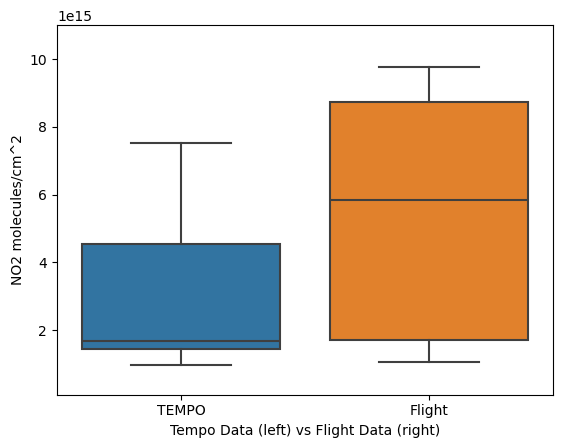

In [11]:
boxplot= sns.boxplot(data=[tempo_vals, flight_vals])
boxplot.set(xlabel= "Tempo Data (left) vs Flight Data (right)", ylabel= "NO2 molecules/cm^2");
boxplot.set_xticklabels(['TEMPO','Flight'])
boxplot.set(ylim=(0.1 * 10**15, 11 * 10**15))
plt.ticklabel_format(style='sci', axis='y', scilimits=(15, 15))

## Mean Bias Calculations

In [12]:
diff_vals= []
for i in range (0, len(tempo_vals)):
    diff= tempo_vals[i] - flight_vals[i]
    diff_vals.append(diff)

diff_vals

[1990122130823168.0,
 -7307502995075072.0,
 296034715282432.0,
 -7218610637031424.0,
 -7989680937016320.0,
 6469830370514944.0]

In [13]:
mean_bias= np.mean(diff_vals)
print(f'The mean bias difference is {mean_bias: .3e} ({mean_bias}) molecules/cm^2')

The mean bias difference is -2.293e+15 (-2293301225417045.5) molecules/cm^2


In [14]:
mb_moles= m_to_m(mean_bias)

print(f'In moles/m^2 that is {mb_moles}')

In moles/m^2 that is -3.808205289633088e-05


## Median Bias Calculations

In [15]:
med_bias= np.median(diff_vals)
print(f'The median bias difference is {med_bias: .3e} ({med_bias}) molecules/cm^2')

The median bias difference is -3.461e+15 (-3461287960874496.0) molecules/cm^2


In [16]:
medb_moles= m_to_m(med_bias)

print(f'In moles/m^2 that is {medb_moles}')

In moles/m^2 that is -5.747738227954992e-05


## Skew Calculations

In [17]:
std_dev= np.std(diff_vals)
skew= 3 * (mean_bias - med_bias) / std_dev
print(f'The skew between the TEMPO satellite data and the flight measurements is {skew: .3e} ({skew}) molecules/cm^2')

The skew between the TEMPO satellite data and the flight measurements is  6.333e-01 (0.6332668157757756) molecules/cm^2


In [18]:
skew_moles= m_to_m(skew)

print(f'In moles/m^2 that is {skew_moles}')

In moles/m^2 that is 1.051588867113543e-20


## Root Mean Squared Error (RMSE) Calculations

In [19]:
def calc_rmse(truth, test):
    # Filter out NaN values
    not_nan_mask= ~np.isnan(truth) & ~np.isnan(test)

    # Apply mask to truth and test datasets
    truth= np.array(truth)[not_nan_mask]
    test= np.array(test)[not_nan_mask]

    # Truth data is considered the correct values we want to compare against, test value gets //
    # compared against truth data
    mse= mean_squared_error(truth, test)
    rmse= np.sqrt(mse)

    return rmse

In [20]:
rmse= calc_rmse(flight_vals, tempo_vals)
print(f'Root mean squared error for TEMPO satellite data against flight measurements is {rmse: .3e} ({rmse}) molecules/cm^2')

Root mean squared error for TEMPO satellite data against flight measurements is  5.990e+15 (5989572448554493.0) molecules/cm^2


In [21]:
rmse_moles= m_to_m(rmse)

print(f'In moles/m^2 that is {rmse_moles}')

In moles/m^2 that is 9.946151525331274e-05


## Mean Bias Error

In [22]:
mean_bias_error= sum(diff_vals) / len(diff_vals)
print(f'The mean bias error between TEMPO satellite data values and flight measurements is {mean_bias_error: .3e} ({mean_bias_error}) molecules/cm^2')

The mean bias error between TEMPO satellite data values and flight measurements is -2.293e+15 (-2293301225417045.5) molecules/cm^2


In [23]:
mbe_moles= m_to_m(mean_bias_error)

print(f'In moles/m^2 that is {mbe_moles: .3e}')

In moles/m^2 that is -3.808e-05
